In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep = ',')

# print first few rows of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.loc[df['tenure']<=15, 'tenureCat'] = 1
df.loc[df['tenure'].between(16,50), 'tenureCat'] = 2
df.loc[df['tenure']>=51, 'tenureCat'] = 3

In [6]:
df.loc[df['MonthlyCharges']<=35, 'MCC'] = 1
df.loc[df['MonthlyCharges'].between(35,65), 'MCC'] = 2
df.loc[df['MonthlyCharges']>=66, 'MCC'] = 3

<AxesSubplot:xlabel='Contract', ylabel='count'>

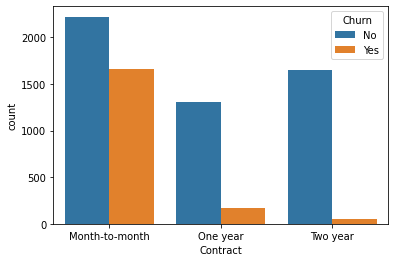

In [7]:
import seaborn as sns
sns.countplot(x = "Contract",hue = "Churn",data=df )

<AxesSubplot:xlabel='tenureCat', ylabel='count'>

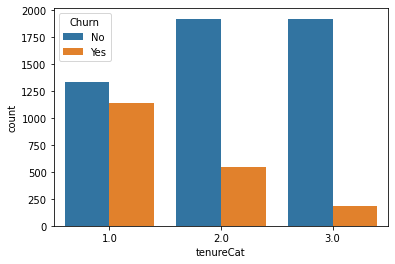

In [8]:
sns.countplot(x = "tenureCat",hue = "Churn",data=df )

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

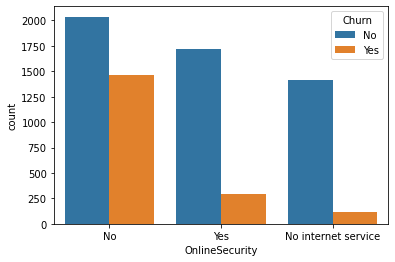

In [9]:
sns.countplot(x = "OnlineSecurity",hue = "Churn",data=df )

In [10]:
df['gender'] =df['gender'].astype('category').cat.codes
df['tenure'] =df['tenure'].astype('category').cat.codes
df['SeniorCitizen'] =df['SeniorCitizen'].astype('category').cat.codes
df['Partner'] =df['Partner'].astype('category').cat.codes
df['Dependents'] =df['Dependents'].astype('category').cat.codes
df['PhoneService'] =df['PhoneService'].astype('category').cat.codes
df['MultipleLines'] =df['MultipleLines'].astype('category').cat.codes
df['InternetService'] =df['InternetService'].astype('category').cat.codes
df['OnlineSecurity'] =df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup'] =df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection'] =df['DeviceProtection'].astype('category').cat.codes
df['TechSupport'] =df['TechSupport'].astype('category').cat.codes
df['StreamingTV'] =df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies'] =df['StreamingMovies'].astype('category').cat.codes
df['Contract'] =df['Contract'].astype('category').cat.codes
df['PaperlessBilling'] =df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod'] =df['PaymentMethod'].astype('category').cat.codes
df['Churn'] =df['Churn'].astype('category').cat.codes

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureCat,MCC
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,29.85,0,1.0,1.0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1889.5,0,2.0,2.0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,1.0,2.0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1840.75,0,2.0,2.0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,1.0,3.0


In [12]:
df[df.columns[1:]].corr()['Churn'][:]

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
Churn               1.000000
tenureCat          -0.340303
MCC                 0.229757
Name: Churn, dtype: float64